In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json 
import csv
import os
import seaborn as sns


from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import  Turbo256, Spectral
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
#from bokeh.sampledata.autompg import autompg_clean as df

#output file
#output_data_file = "Census_output/Census_data_total_2013.csv"



Census_2007 = os.path.join('Census_output', 'Census_data_total_2007.csv')
Census_2013 = os.path.join('Census_output', 'Census_data_total_2013.csv')
DUI = os.path.join('elizabeth_project_work', 'output_data_file', 'dui2007stats.csv')

Census_2007_df = pd.read_csv(Census_2007)
Census_2013_df = pd.read_csv(Census_2013)
DUI_df = pd.read_csv(DUI)


In [65]:
New_DUI_df = DUI_df[['State_2007', ]]
state_count = New_DUI_df['State_2007'].value_counts().rename_axis('State_2007').reset_index(name='DUI Count')
state_count

,State_2007,DUI Count
0,PA,1045
1,CA,882
2,OH,868
3,AZ,776
4,NC,634
5,TX,596
6,NY,528
7,FL,523
8,TN,523
9,MA,462


In [66]:
new_Census_2007 = Census_2007_df[['State_Census_2007','Population_Census_2007']]
new_Census_2007 = new_Census_2007.drop(0)
new_Census_2007


,State_Census_2007,Population_Census_2007
1,Alabama,4672840.0
2,Alaska,680300.0
3,Arizona,6167681.0
4,Arkansas,2848650.0
5,California,36250311.0
6,Colorado,4803868.0
7,Connecticut,3527270.0
8,Delaware,871749.0
9,District of Columbia,574404.0
10,Florida,18367842.0


In [71]:
#x = state_count['State']
#y = state_count['DUI Count']

output_file("bar_colormapped.html")

state = state_count['State_2007']
counts = state_count['DUI Count']

source = ColumnDataSource(data=dict(state=state, counts=counts))

p = figure(x_range=state, plot_height=1000, plot_width=1000, toolbar_location=None, title="DUI By State for 2007")
p.vbar(x='state', top='counts', width=1, source=source, legend_field="state",
       line_color='white', fill_color=factor_cmap('state', palette=Turbo256, factors=state))
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 1700
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

Text(0.5, 1.0, 'DUI By State Vs Total Population for 2007')

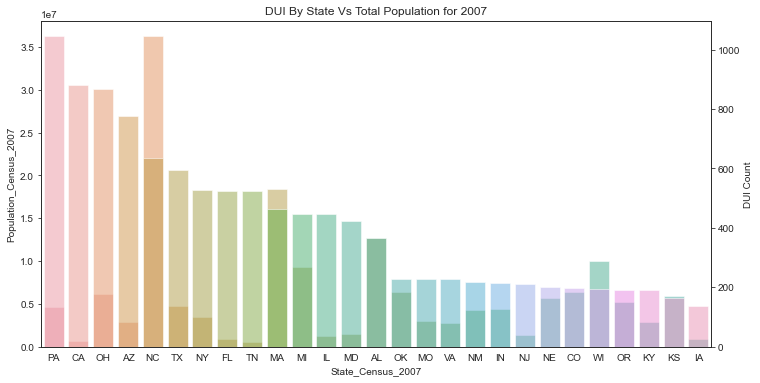

In [70]:

#Set general plot properties
#matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(data = new_Census_2007, x='State_Census_2007', y='Population_Census_2007', alpha=0.5, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = state_count, x='State_2007', y='DUI Count', alpha=0.5, ax=ax2).set_title('DUI By State Vs Total Population for 2007')